In [1]:
import numpy as np
import pandas as pd 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
unique, counts = np.unique(y_train, return_counts = True)
print("Y train distribution: ",dict(zip(unique, counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [6]:
unique, counts = np.unique(y_test, return_counts = True)
print("Y test distribution: ",dict(zip(unique, counts)))

Y test distribution:  {0: 12500, 1: 12500}


In [8]:
d = X_train[0]
print(d)
print(len(d))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [9]:
review_len_train = []
review_len_test = []

for i, ii in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Train mean:  238.71364
Train median:  178.0
Train mode:  ModeResult(mode=array([132]), count=array([196]))


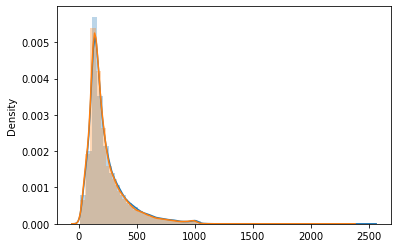

In [10]:
sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
sns.distplot(review_len_test, hist_kws = {"alpha":0.3})

print("Train mean: ", np.mean(review_len_train))
print("Train median: ", np.median(review_len_train))
print("Train mode: ", stats.mode(review_len_train))

In [36]:
num_words = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

maxlen = 32
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [54]:
rnn = Sequential()
rnn.add(Embedding(num_words,16,input_length=(maxlen)))
rnn.add(SimpleRNN(16,input_shape=(num_words,maxlen),return_sequences = False, activation="tanh"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
history = rnn.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=2,batch_size=32,verbose=1)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 32, 16)            16000     
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
_________________________________________________________________
activation_18 (Activation)   (None, 1)                 0         
Total params: 16,545
Trainable params: 16,545
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
782/782 [==============================] - 9s 11ms/step - loss: 0.6152 - accuracy: 0.6389 - val_loss: 0.4962 - val_accuracy: 0.7609
Epoch 2/2
782/782 [==============================] - 8s 11ms/step - loss: 0.4815 - accuracy: 0.7689 

Accuracy: 76.7


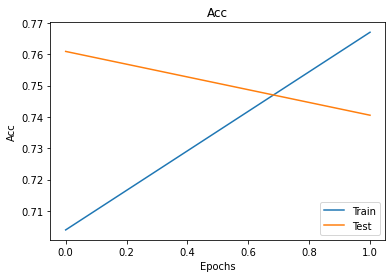

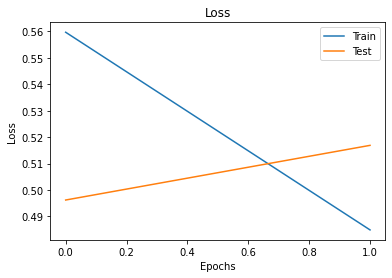

In [55]:
print(f"Accuracy:",round(history.history["accuracy"][-1]*100,2))

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [57]:
from keras.layers import LSTM

In [58]:
max_words = 10240
maxlen = 32

(X_train, y_train), (_,_) = imdb.load_data(nb_words = max_words)
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [67]:
model = Sequential()
model.add(Embedding(max_words, 16, input_length = maxlen))
model.add(LSTM(128))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics= ["accuracy"])

history = model.fit(X_train, y_train, batch_size=128,epochs=10,verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
196/196 [==============================] - 20s 91ms/step - loss: 0.6195 - accuracy: 0.6272 - val_loss: 0.4953 - val_accuracy: 0.7524
Epoch 2/10
196/196 [==============================] - 17s 89ms/step - loss: 0.3728 - accuracy: 0.8345 - val_loss: 0.4886 - val_accuracy: 0.7564
Epoch 3/10
196/196 [==============================] - 17s 89ms/step - loss: 0.3225 - accuracy: 0.8649 - val_loss: 0.4970 - val_accuracy: 0.7531
Epoch 4/10
196/196 [==============================] - 18s 91ms/step - loss: 0.2782 - accuracy: 0.8882 - val_loss: 0.5034 - val_accuracy: 0.7510
Epoch 5/10
196/196 [==============================] - 17s 89ms/step - loss: 0.2565 - accuracy: 0.9014 - val_loss: 0.5056 - val_accuracy: 0.7496
Epoch 6/10
196/196 [==============================] - 17s 89ms/step - loss: 0.2344 - accuracy: 0.9089 - val_loss: 0.5190 - val_accuracy: 0.7418
Epoch 7/10
196/196 [==============================] - 17s 88ms/step - loss: 0.2064 - accuracy: 0.9250 - val_loss: 0.5728 - val_accuracy:

In [68]:
print(model.summary())


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 32, 16)            163840    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               74240     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 238,209
Trainable params: 238,209
Non-trainable params: 0
_________________________________________________________________
None


Accuracy: 95.06


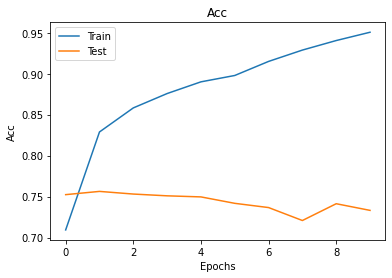

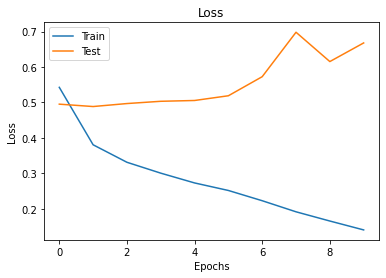

In [69]:
print(f"Accuracy:",round(history.history["accuracy"][-1]*100,2))

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()